# Wizualizacja danych

http://smarterpoland.pl/index.php/2019/12/najgorszy-wykres-2019/

http://smarterpoland.pl/index.php/2020/12/plebiscyt-na-najgorszy-wykres-roku-2020/

http://smarterpoland.pl/index.php/2021/12/plebiscyt-na-najgorszy-wykres-roku-2021/

http://www.biecek.pl/Eseje/

*Factfulness: Ten Reasons We're Wrong About the World – and Why Things Are Better Than You Think*

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats

*Wykres* będzie dla nas reprezentacją *danych*. Wykres składa się z *elementów*, takich jak słupki, koła, ikony. 

Dane składają się ze *zmiennych* (cena, waga, temperatura, prędkość) które opisane są w *skalach*. 

Wizualizacja danych polega na *przedstawieniu/zakodowaniu* danych za pomocą *cech* elementów wykresów.'



# Skale pomiarowe

* **skala ilorazowa** (ang.*ratio scale*) - skala, w której istnieje fizyczny sens zarówno dla różnic i ilorazów, np. cena produktu (kilogram jabłek może być o 2 zł tańszy od kilograma gruszek, kilogram ogórków jest dwa razy tańszy od kilograma pomidorów);

* **skala przedziałowa** (ang. *interval scale*) - skala, w której istnieje fizyczny sens różnic wartości, ale nie ich ilorazów, np. daty, temperatura (I Wojna Światową rozpoczęła się 25 lat przed II Wojną Światową);

* **skala porządkowa** (ang. *ordinal scale*) - skala, dla której istnieje fizyczny sens dla kolejności wartości, ale nie dla ich różnic czy ilorazów, np. wykształcenie;

* **skala nominalna** (ang. *nominal scale*) - skala, w której wartości można zapisać za pomocą liczb, ale nie ma fizycznej interpretacji dla kolejności tych wartości, różnic czy ilorazów, np. numer PESEL;

# Typy wykresów

### Wykres punktowy (ang. *scatter plot*)
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna.

In [33]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

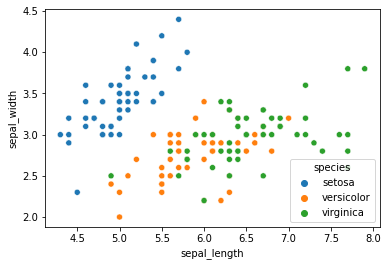

In [34]:
sns.scatterplot(x = "sepal_length", y = "sepal_width", data = df, hue="species")

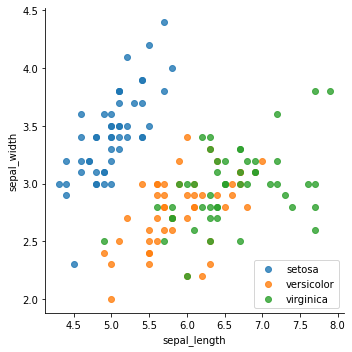

In [35]:
# df = sns.load_dataset('iris')
 
sns.lmplot(x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False)
plt.legend(loc='lower right')

### Wykres słupkowy (ang. *bar plot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

In [36]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
?sns.barplot

Signature:
sns.barplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    estimator=<function mean at 0x7f8f740a0940>,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    errcolor='.26',
    errwidth=None,
    capsize=None,
    dodge=True,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric
variable with the height of each rectangle and provides some indication of
the uncertainty around that estimate using error bars. Bar plots include 0
in the quantitative axis range, and they are a good choice when 0 is a
meaningful value for the quantitative variable, and you want to make
comparisons against it.

For datasets where 0 is not a meaningful value, a point plot will allow you
to focus on differences between levels of one or more catego

<AxesSubplot:xlabel='sex', ylabel='survived'>

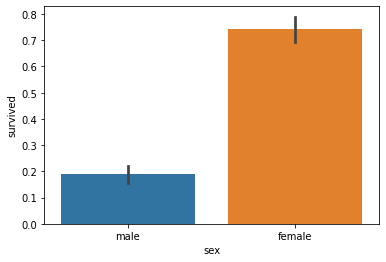

In [38]:
sns.barplot(x="sex", y="survived", data=titanic)

<AxesSubplot:xlabel='sex', ylabel='survived'>

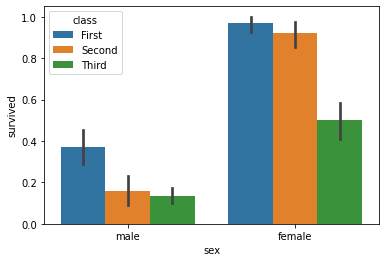

In [39]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

### Skumulowany wykres słupkowy (ang. *stacked bar plot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

In [40]:
grouped_titanic = titanic.groupby(['class', 'sex'])['survived'].agg('sum')
grouped_titanic

class   sex   
First   female    91
        male      45
Second  female    70
        male      17
Third   female    72
        male      47
Name: survived, dtype: int64

In [41]:
sex = np.unique(titanic['sex'])

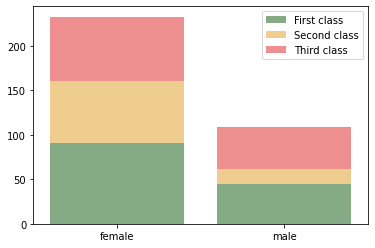

In [42]:
sns.barplot(x=sex, y=grouped_titanic['First'].values, label="First class",
            color="darkgreen", alpha=0.5)
sns.barplot(x=sex, y=grouped_titanic['Second'].values, 
            bottom=grouped_titanic['First'].values, label='Second class',
            color="orange", alpha=0.5)
sns.barplot(x=sex, y=grouped_titanic['Third'].values, 
            bottom=grouped_titanic['First'].values + grouped_titanic['Second'].values, 
            label='Third class', color="red", alpha=0.5)
plt.legend()
plt.show()

### Histogram (ang. *histogram*) 
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna.

In [43]:
?sns.distplot

Signature:
sns.distplot(
    a=None,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
    x=None,
)
Docstring:
DEPRECATED: Flexibly plot a univariate distribution of observations.

.. warning::
   This function is deprecated and will be removed in a future version.
   Please adapt your code to use one of two new functions:

   - :func:`displot`, a figure-level function with a similar flexibility
     over the kind of plot to draw
   - :func:`histplot`, an axes-level function for plotting histograms,
     including with kernel density smoothing

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF

/home/mikolaj/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


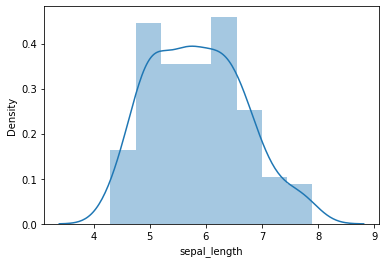

In [44]:
df = sns.load_dataset('iris')
  
sns.distplot(df["sepal_length"], kde=True)
plt.show()

/home/mikolaj/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mikolaj/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


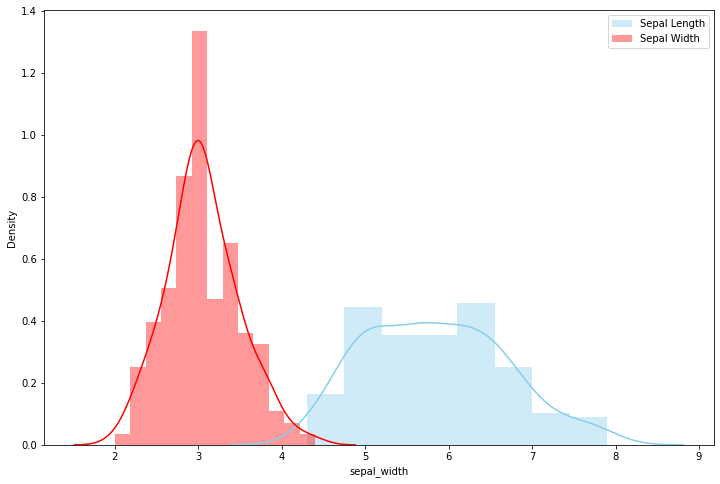

In [45]:
plt.figure(figsize=(12, 8))

sns.distplot( df["sepal_length"] , color="skyblue", label="Sepal Length")
sns.distplot( df["sepal_width"] , color="red", label="Sepal Width")
plt.legend()

### Estymator jądrowy gęstości (ang. *kernel density plot*) 
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna

In [46]:
?sns.kdeplot

Signature:
sns.kdeplot(
    x=None,
    *,
    y=None,
    shade=None,
    vertical=False,
    kernel=None,
    bw=None,
    gridsize=200,
    cut=3,
    clip=None,
    legend=True,
    cumulative=False,
    shade_lowest=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    ax=None,
    weights=None,
    hue=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    multiple='layer',
    common_norm=True,
    common_grid=False,
    levels=10,
    thresh=0.05,
    bw_method='scott',
    bw_adjust=1,
    log_scale=None,
    color=None,
    fill=None,
    data=None,
    data2=None,
    warn_singular=True,
    **kwargs,
)
Docstring:
Plot univariate or bivariate distributions using kernel density estimation.

A kernel density estimate (KDE) plot is a method for visualizing the
distribution of observations in a dataset, analagous to a histogram. KDE
represents the data using a continuous probability density curve in one or
more dimensions.

The approach is explained further 

/home/mikolaj/.local/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/mikolaj/.local/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


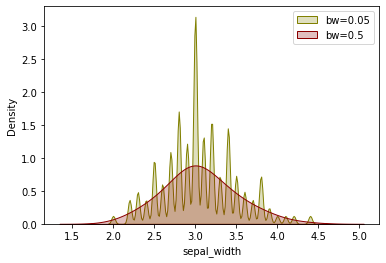

In [47]:
df = sns.load_dataset('iris')
 
# bw - parametr wygładzania
sns.kdeplot(df['sepal_width'], shade=True, bw=.05, color="olive")
sns.kdeplot(df['sepal_width'], shade=True, bw=.5, color="darkred")
plt.legend(["bw=0.05", "bw=0.5"])
plt.show()

### Pair plot 
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna.

<Figure size 1296x720 with 0 Axes>

<Figure size 800x640 with 0 Axes>

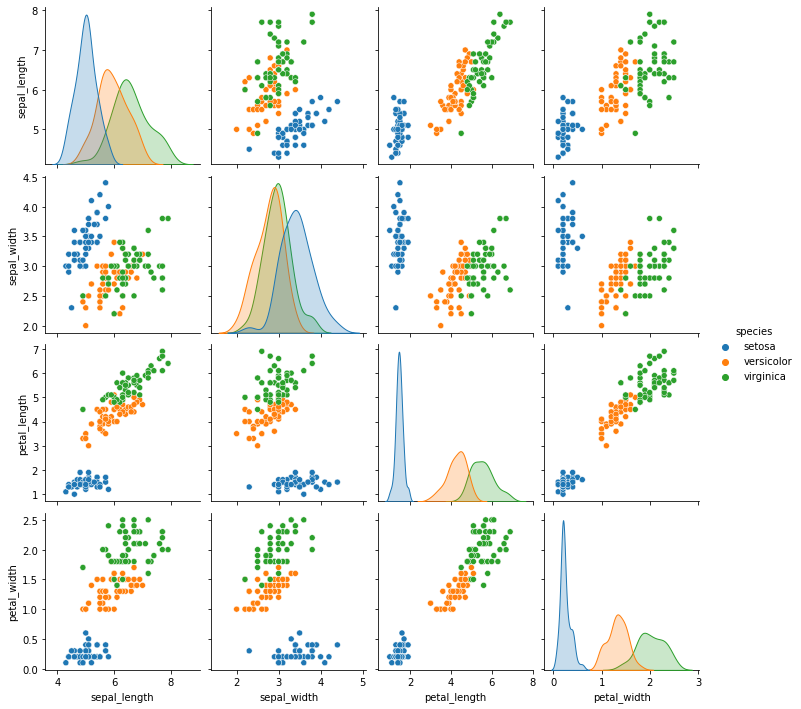

In [48]:
plt.figure(figsize=(18, 10))
df = sns.load_dataset('iris')

plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species")
plt.show()

### Wykres pudełkowy (ang. *boxplot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

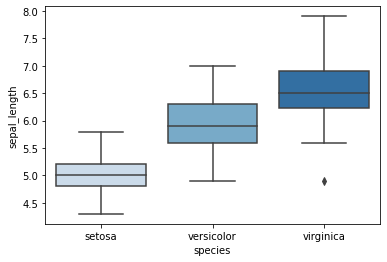

In [49]:
df = sns.load_dataset('iris')
 
sns.boxplot( x=df["species"], y=df["sepal_length"], palette="Blues")

In [50]:
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Text(0, 0.5, 'Total bill')

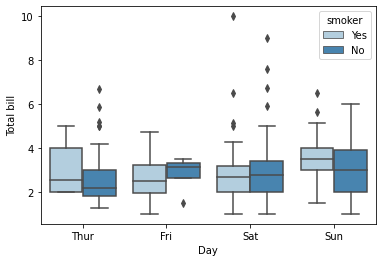

In [51]:
df = sns.load_dataset('tips')
 
# Grouped boxplot
sns.boxplot(x="day", y="tip", hue="smoker", data=df, palette="Blues")
plt.xlabel("Day")
plt.ylabel("Total bill")

### Wykres skrzypcowy (ang. *violin plot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

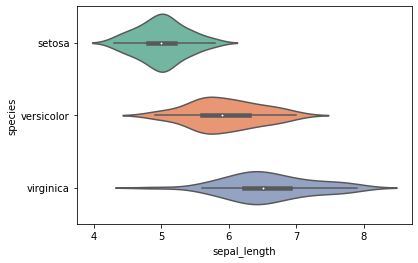

In [52]:
df = sns.load_dataset('iris')

# plt.figure(figsize=(18, 10))
sns.violinplot( y=df["species"], x=df["sepal_length"], palette="Set2")

### Mapa termiczna (ang. *heat map*) 
$X$ - , $Y$ - , $Z$ - zmienna numeryczna.

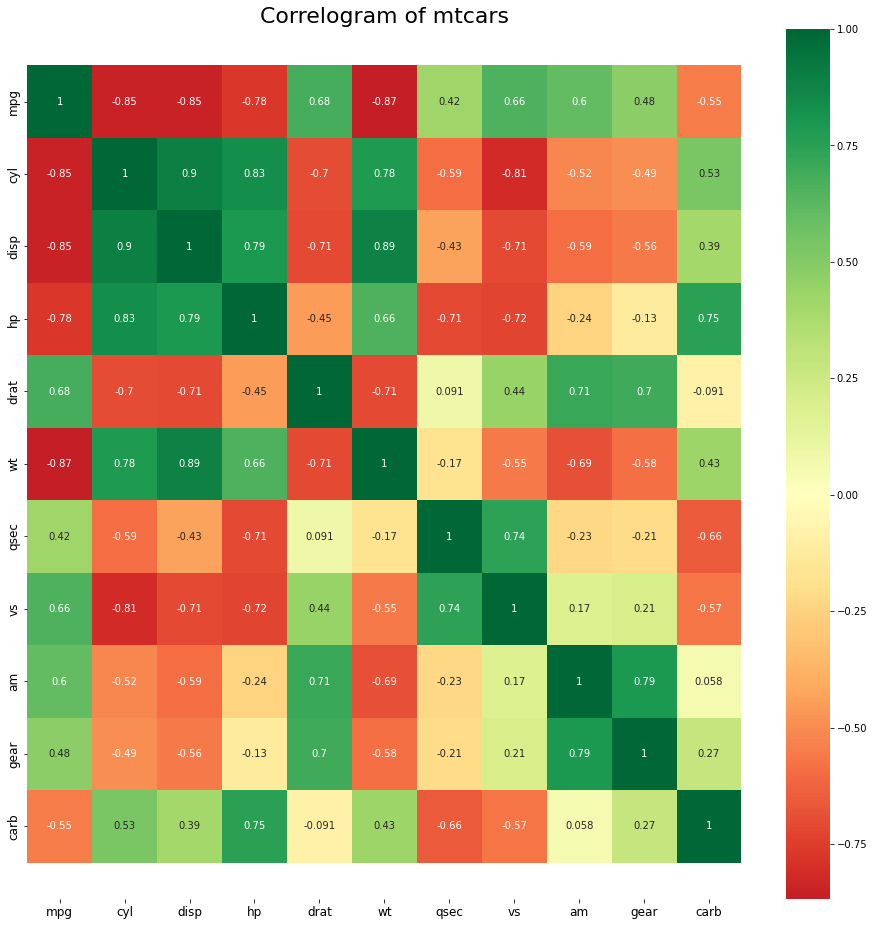

In [53]:
df = pd.read_csv("../data/mtcars.csv")

# Plot
plt.figure(figsize=(16, 16))
ax = sns.heatmap(df.corr(), 
                 xticklabels=df.corr().columns, 
                 yticklabels=df.corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Zadanie - `nycflights13`

Zbiór danych `nycflights13` (https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf) zawiera dane dotyczące wszystkich lotów rozpoczynających się w Nowym Jorku w 2013 r. 

Obejmuje metadane dotyczące linii lotniczych, lotnisk, pogody i samolotów.

Narysuj wykresy prezentujące:

    1. dzienną liczbę lotów;
    
    2. udział zrealizowanych lotów w każdym miesiącu;
    
    3. udział linii lotnicznych w zrealizowanych lotach;
    
    4. udział lotów, które wystartowały po czasie, wystartowały przed czasem, wystartowały na czas w każdym miesiącu.
    
    5. rozkład opóźnienia odlotu względem opóźnienia przylotu;
    
    6. porównanie rozkładu opóźnienia odlotu i przylotu w każdym dniu tygodnia;
    
    7. związek opóźnienia startu samolotu a prędkością wiatru.

### 1. Dzienna liczba lotów

In [54]:
nycflights13 = pd.read_csv("../data/nycflights13.csv")
nycflights13.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour.y
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,39.92,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0,2013-01-01 06:00:00


In [55]:
import datetime

In [56]:
nycflights13["date"] = nycflights13["year"].astype("string") + "-" + nycflights13["month"].astype("string")+ "-" + nycflights13["day"].astype("string")
nycflights13["date"] = nycflights13["date"].apply(datetime.datetime.strptime, args=("%Y-%m-%d",))
nycflights13["date"]

0        2013-01-01
1        2013-01-01
2        2013-01-01
3        2013-01-01
4        2013-01-01
            ...    
336771   2013-09-30
336772   2013-09-30
336773   2013-09-30
336774   2013-09-30
336775   2013-09-30
Name: date, Length: 336776, dtype: datetime64[ns]

In [57]:
df = nycflights13.groupby(['date'])['date'].count().reset_index(name='counts')
df

,date,counts
0,2013-01-01,842
1,2013-01-02,943
2,2013-01-03,914
3,2013-01-04,915
4,2013-01-05,720
...,...,...
360,2013-12-27,963
361,2013-12-28,814
362,2013-12-29,888
363,2013-12-30,968


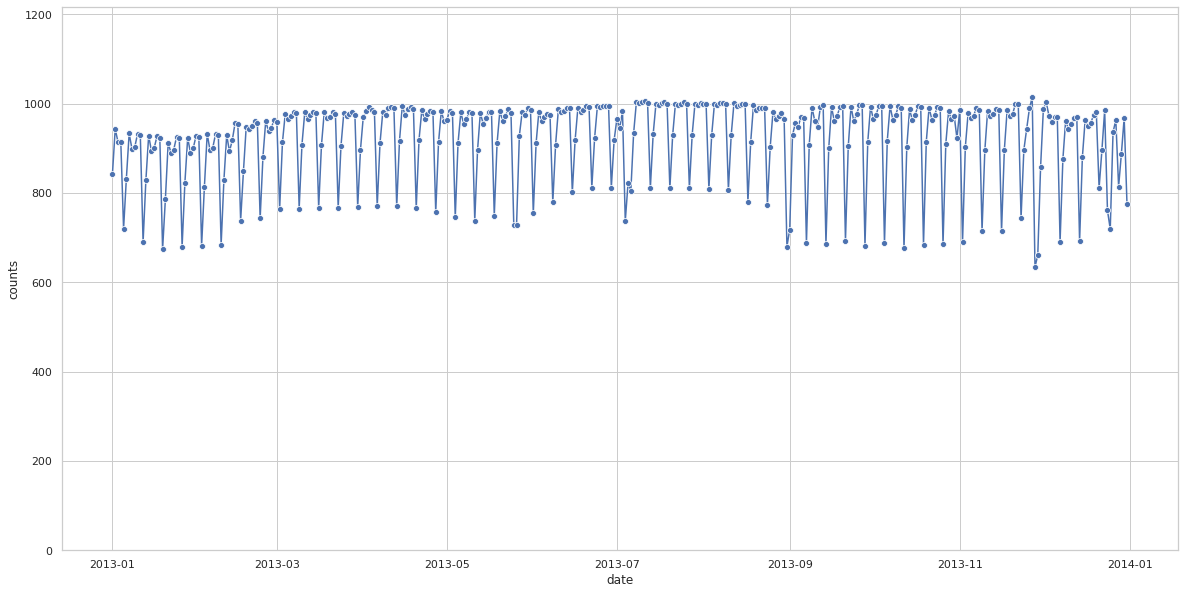

In [58]:
sns.set(style="whitegrid", rc = {'figure.figsize':(20,10)})
sns.lineplot(data = df, x = "date", y = "counts", marker="o")

plt.ylim(0, 1.2*max(df["counts"]))
plt.show()

In [59]:
import datetime

In [60]:
nycflights13['date'] = nycflights13.apply(
    lambda row: datetime.datetime(row.year, row.month, row.day), axis=1
)

In [61]:
nycflights13.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour.y,date
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 05:00:00,2013-01-01
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01 05:00:00,2013-01-01
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00,2013-01-01
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00,2013-01-01
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0,2013-01-01 06:00:00,2013-01-01


In [62]:
flights_per_date = nycflights13.groupby('date')['year'].count()
flights_per_date

date
2013-01-01    842
2013-01-02    943
2013-01-03    914
2013-01-04    915
2013-01-05    720
             ... 
2013-12-27    963
2013-12-28    814
2013-12-29    888
2013-12-30    968
2013-12-31    776
Name: year, Length: 365, dtype: int64

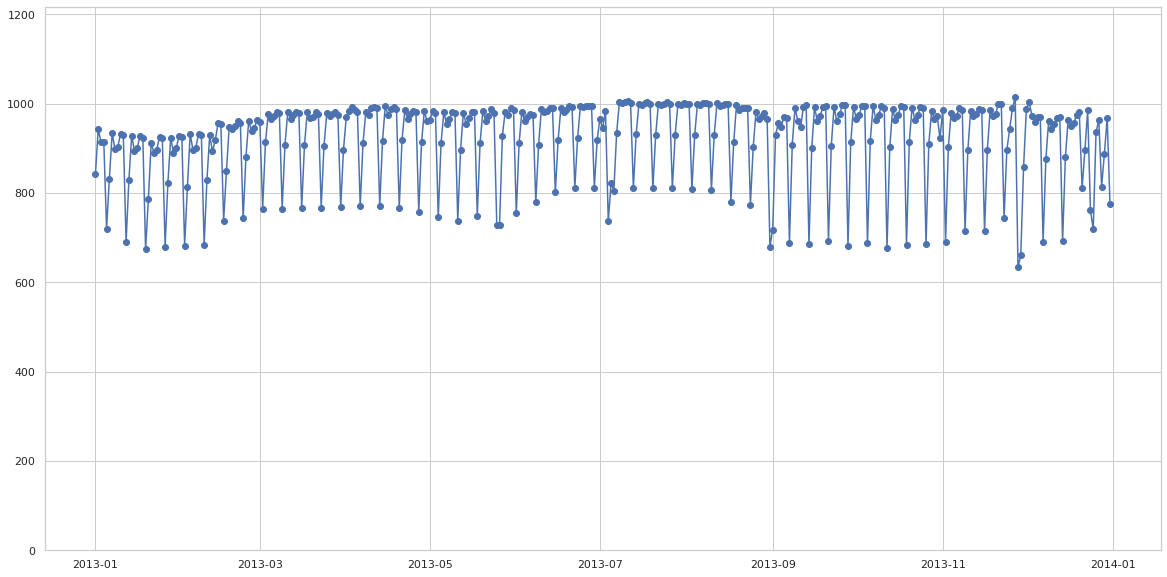

In [63]:
sns.set(style="whitegrid")
plt.figure(figsize = (20, 10))


plt.plot(flights_per_date, "o-")
plt.ylim(0, 1.2 * flights_per_date.max())
plt.show()

### 2. udział zrealizowanych lotów w każdym miesiącu
porównanie wykresu kołowego z słupkowym

In [64]:
flights_per_month = nycflights13.groupby('month')['month'].count()
flights_per_month

month
1     27004
2     24951
3     28834
4     28330
5     28796
6     28243
7     29425
8     29327
9     27574
10    28889
11    27268
12    28135
Name: month, dtype: int64

In [65]:
import calendar
mylabels = [calendar.month_name[i] for i in flights_per_month.index]

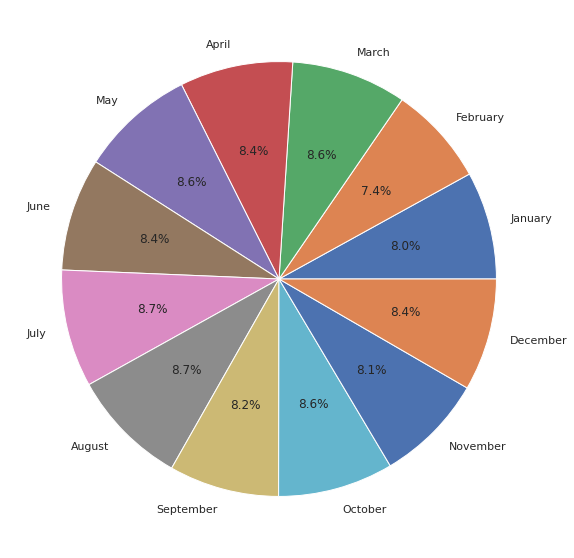

In [66]:
plt.figure(figsize=(20, 10))

plt.pie(flights_per_month, labels=mylabels, autopct='%1.1f%%')
plt.show()

<AxesSubplot:ylabel='month'>

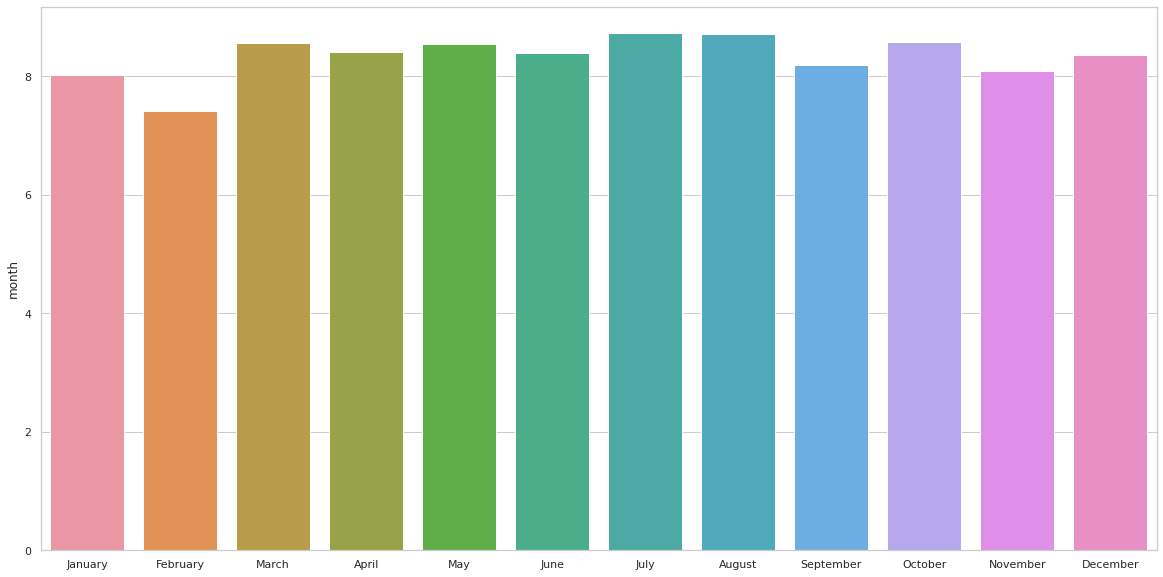

In [67]:
plt.figure(figsize=(20, 10))

sns.barplot(x=mylabels, y=100*flights_per_month/flights_per_month.sum())

In [68]:
?plt.pie

Signature:
plt.pie(
    x,
    explode=None,
    labels=None,
    colors=None,
    autopct=None,
    pctdistance=0.6,
    shadow=False,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    *,
    normalize=True,
    data=None,
)
Docstring:
Plot a pie chart.

Make a pie chart of array *x*.  The fractional area of each wedge is
given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
the fractional area directly and the array will not be normalized. The
resulting pie will have an empty wedge of size ``1 - sum(x)``.

The wedges are plotted counterclockwise, by default starting from the
x-axis.

Parameters
----------
x : 1D array-like
    The wedge sizes.

explode : array-like, default: None
    If not *None*, is a ``len(x)`` array which specifies the fraction
    of the radius with which to offset each wedge.

labels : list, default: None
    A se

In [69]:
import calendar

In [70]:
calendar.month_name[1]

'January'

In [71]:
flights_per_month = nycflights13.groupby('month')['year'].count()
flights_per_month

month
1     27004
2     24951
3     28834
4     28330
5     28796
6     28243
7     29425
8     29327
9     27574
10    28889
11    27268
12    28135
Name: year, dtype: int64

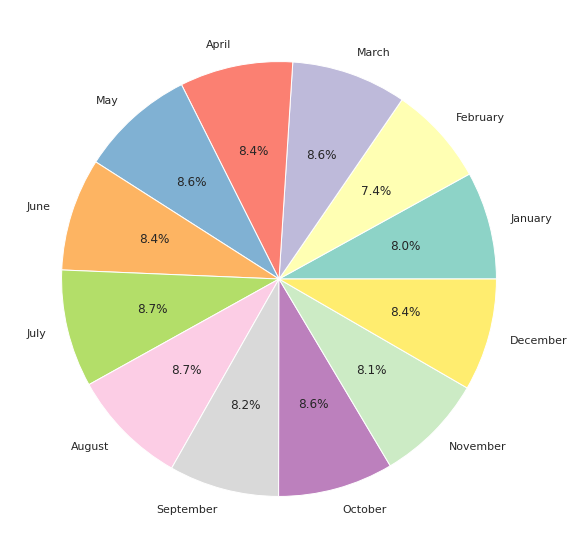

In [72]:
# wykres kołowy

plt.figure(figsize=(20, 10))

cs = cm.Set3(np.arange(13))

plt.pie(flights_per_month, labels=[calendar.month_name[i] for i in flights_per_month.index],
       autopct="%1.1f%%", colors=cs)
plt.show()

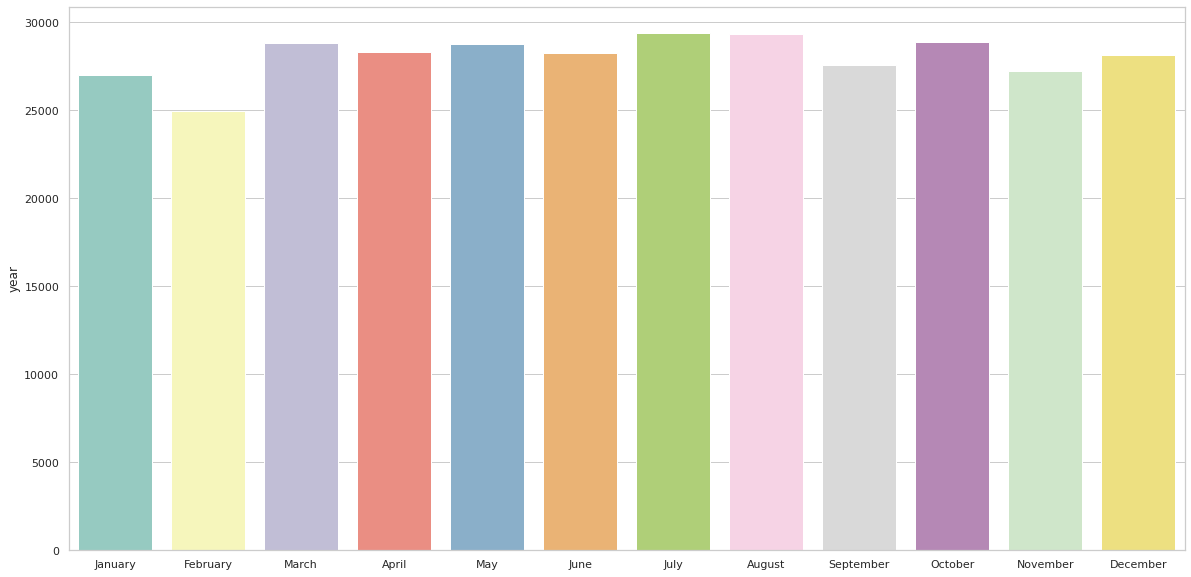

In [73]:
plt.figure(figsize=(20, 10))

cs = cm.Set3(np.arange(13))

sns.barplot(y = flights_per_month, x =[calendar.month_name[i] for i in flights_per_month.index], palette="Set3")
plt.show()

###     3. udział linii lotnicznych w zrealizowanych lotach


In [74]:
flights_per_carrier = nycflights13.groupby('carrier_name')['year'].count()
flights_per_carrier

carrier_name
AirTran Airways Corporation     3260
Alaska Airlines Inc.             714
American Airlines Inc.         32729
Delta Air Lines Inc.           48110
Endeavor Air Inc.              18460
Envoy Air                      26397
ExpressJet Airlines Inc.       54173
Frontier Airlines Inc.           685
Hawaiian Airlines Inc.           342
JetBlue Airways                54635
Mesa Airlines Inc.               601
SkyWest Airlines Inc.             32
Southwest Airlines Co.         12275
US Airways Inc.                20536
United Air Lines Inc.          58665
Virgin America                  5162
Name: year, dtype: int64

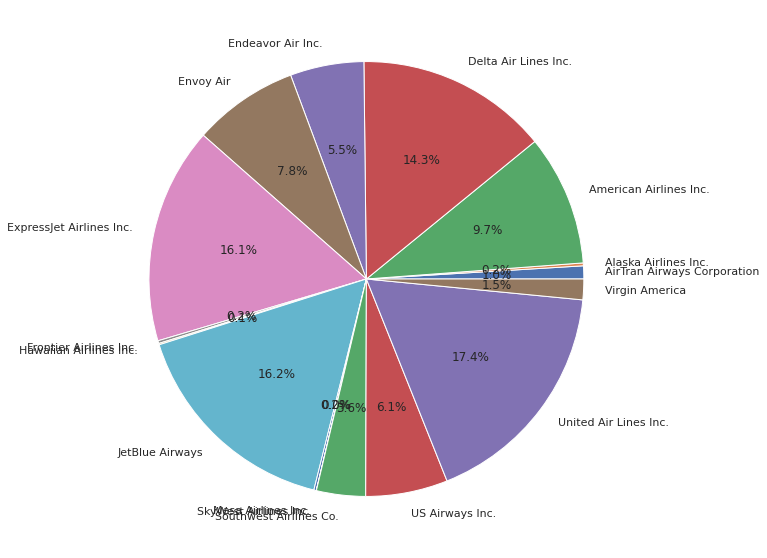

In [75]:

plt.figure(figsize=(20, 10))

# cs = cm.Set3(np.arange(13))

plt.pie(flights_per_carrier, labels=flights_per_carrier.index,
       autopct="%1.1f%%")
plt.show()

In [76]:
flights_per_carrier.sum()

336776

In [77]:
OTHER_GROUP_THRESHOLD = 0.05
OTHER_GROUP_NAME = 'Other'

all_flights = flights_per_carrier.sum()

flights_per_carrier = flights_per_carrier.reset_index()
flights_per_carrier.columns = ['carrier_name', 'count']

flights_per_carrier['carrier_group_name'] = flights_per_carrier.apply(
    lambda row: 
    row['carrier_name'] if row['count'] / all_flights >= OTHER_GROUP_THRESHOLD else OTHER_GROUP_NAME,
    axis=1
)


In [78]:
flights_per_carrier

,carrier_name,count,carrier_group_name
0,AirTran Airways Corporation,3260,Other
1,Alaska Airlines Inc.,714,Other
2,American Airlines Inc.,32729,American Airlines Inc.
3,Delta Air Lines Inc.,48110,Delta Air Lines Inc.
4,Endeavor Air Inc.,18460,Endeavor Air Inc.
5,Envoy Air,26397,Envoy Air
6,ExpressJet Airlines Inc.,54173,ExpressJet Airlines Inc.
7,Frontier Airlines Inc.,685,Other
8,Hawaiian Airlines Inc.,342,Other
9,JetBlue Airways,54635,JetBlue Airways


In [79]:
flights_per_carrier_group = flights_per_carrier.groupby('carrier_group_name')['count'].sum()

In [80]:
flights_per_carrier_group

carrier_group_name
American Airlines Inc.      32729
Delta Air Lines Inc.        48110
Endeavor Air Inc.           18460
Envoy Air                   26397
ExpressJet Airlines Inc.    54173
JetBlue Airways             54635
Other                       23071
US Airways Inc.             20536
United Air Lines Inc.       58665
Name: count, dtype: int64

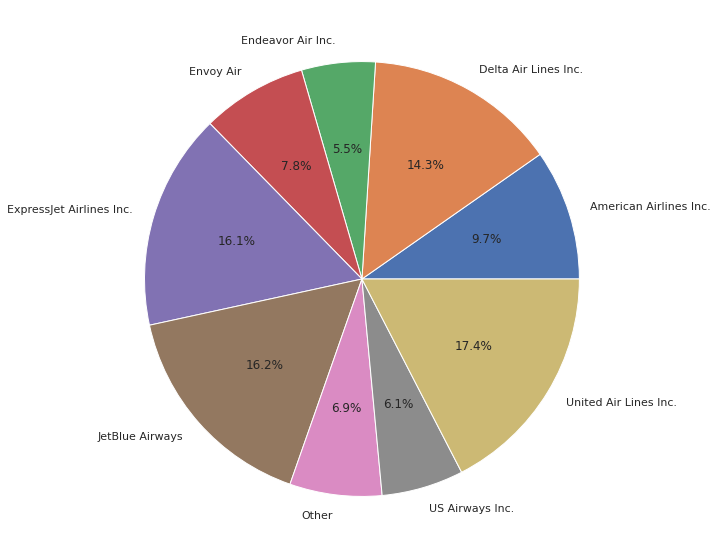

In [81]:

plt.figure(figsize=(20, 10))

# cs = cm.Set3(np.arange(13))

plt.pie(flights_per_carrier_group, labels=flights_per_carrier_group.index,
       autopct="%1.1f%%")
plt.show()

###     4. udział lotów, które wystartowały po czasie, wystartowały przed czasem, wystartowały na czas w każdym miesiącu.


In [82]:
nycflights13 = pd.read_csv("../data/nycflights13.csv")

In [83]:
nycflights13.dropna(subset = ["dep_delay"], inplace=True)
nycflights13

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour.y
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,39.92,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,...,60.98,55.94,83.47,230.0,9.20624,NaN,0.0,1016.5,10.0,2013-09-30 22:00:00
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,...,60.98,55.94,83.47,230.0,9.20624,NaN,0.0,1016.5,10.0,2013-09-30 22:00:00
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,...,60.98,55.94,83.47,230.0,9.20624,NaN,0.0,1016.5,10.0,2013-09-30 22:00:00
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,...,60.98,55.94,83.47,230.0,9.20624,NaN,0.0,1016.5,10.0,2013-09-30 22:00:00


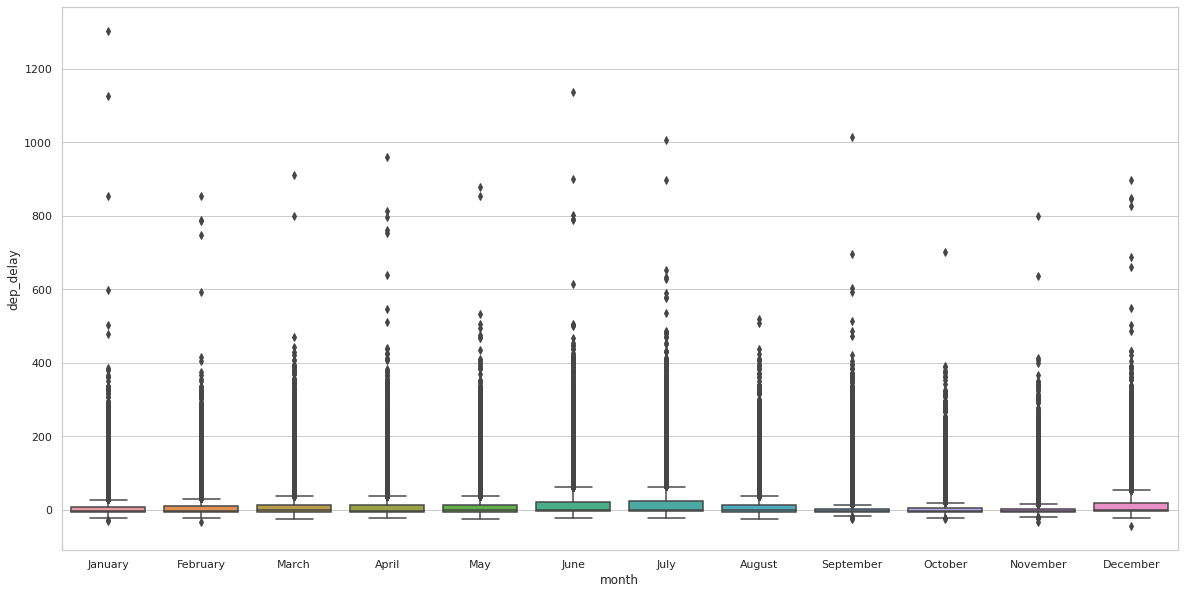

In [84]:
sns.boxplot(x=nycflights13['month'].sort_values().apply(lambda x: calendar.month_name[x]), y=nycflights13['dep_delay'])
plt.show()

In [85]:
grouped = nycflights13.groupby(["month"])["dep_delay"]
dep_delay_count_per_month = pd.DataFrame()
dep_delay_count_per_month['on_time'] = grouped.agg(lambda x: sum(y == 0 for y in x))
dep_delay_count_per_month['delay'] = grouped.agg(lambda x: sum(y > 0 for y in x))
dep_delay_count_per_month['ahead'] = grouped.agg(lambda x: sum(y < 0 for y in x))
dep_delay_count_per_month['N'] = dep_delay_count_per_month['on_time'] + dep_delay_count_per_month['delay'] + dep_delay_count_per_month['ahead']
dep_delay_count_per_month

,on_time,delay,ahead,N
month,,,,
1,1409,9662,15412,26483
2,1169,9124,13397,23690
3,1432,11209,15332,27973
4,1243,10543,15876,27662
5,1393,11291,15549,28233
6,1317,12655,13262,27234
7,1432,13909,13144,28485
8,1539,11713,15589,28841
9,1239,7815,18068,27122


In [86]:
# nycflights13["dep_delay_type"] = nycflights13['dep_delay'].apply(lambda x: "Ahead" if x < 0 else "Delay" if x > 0 else "On time")
# nycflights13.groupby(["month", "dep_delay_type"])["dep_delay_type"].count()

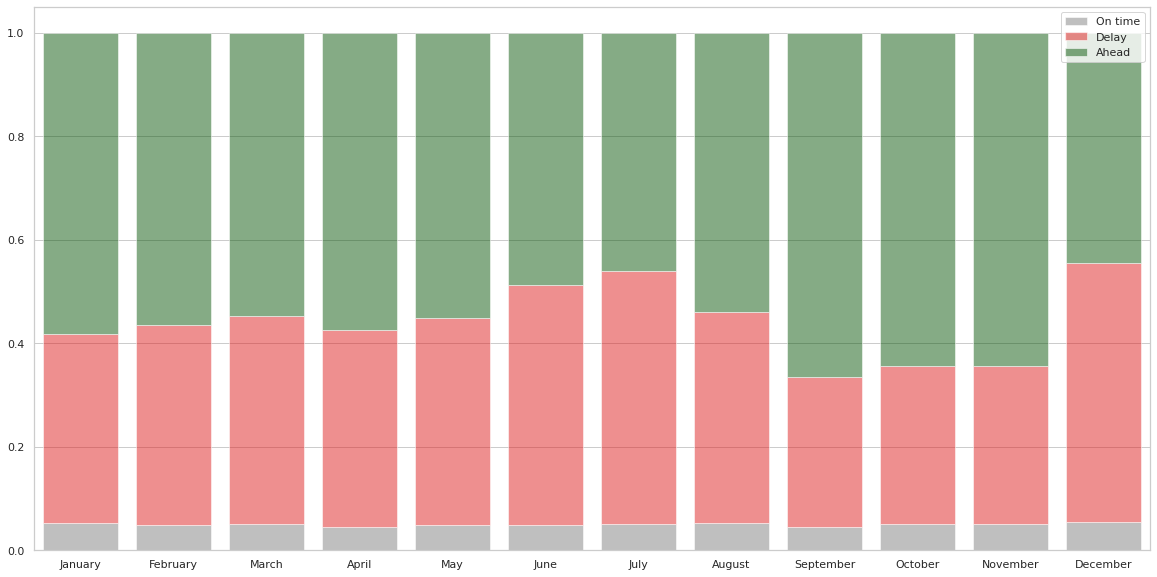

In [87]:
sns.barplot(x=[calendar.month_name[elem] for elem in dep_delay_count_per_month.index.tolist()], 
            y=dep_delay_count_per_month['on_time']/dep_delay_count_per_month['N'], 
            label="On time", color="grey", alpha=0.5)
sns.barplot(x=[calendar.month_name[elem] for elem in dep_delay_count_per_month.index.tolist()], 
            y=dep_delay_count_per_month['delay']/dep_delay_count_per_month['N'], 
            label="Delay", color="red", alpha=0.5,
            bottom=dep_delay_count_per_month['on_time']/dep_delay_count_per_month['N'])
sns.barplot(x=[calendar.month_name[elem] for elem in dep_delay_count_per_month.index.tolist()], 
            y=dep_delay_count_per_month['ahead']/dep_delay_count_per_month['N'], 
            label="Ahead", color="darkgreen", alpha=0.5,
            bottom=(dep_delay_count_per_month['on_time']+dep_delay_count_per_month['delay'])/dep_delay_count_per_month['N'])
plt.legend()
plt.show()

### 5. rozkład opóźnienia odlotu względem opóźnienia przylotu

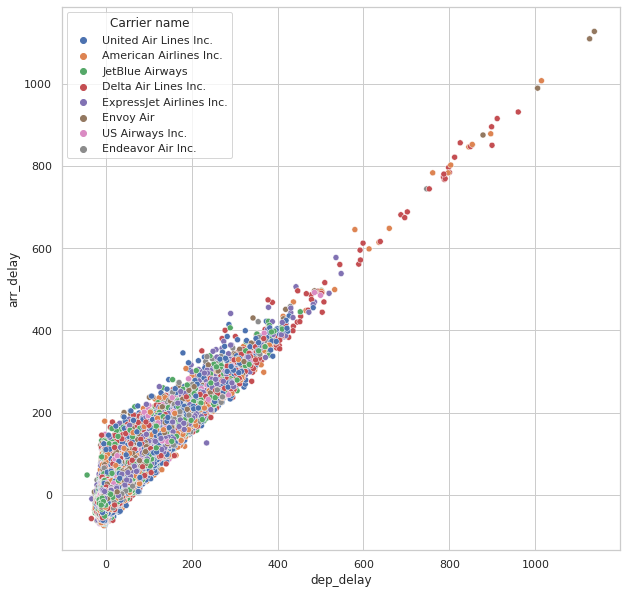

In [141]:
plt.figure(figsize = (10,10))

sns.scatterplot(x = "dep_delay", y = "arr_delay", hue = "carrier_name", data = nycflights13[nycflights13["carrier_name"].apply(lambda x: x in flights_per_carrier[flights_per_carrier.carrier_group_name!="Other"].carrier_group_name.tolist())])

plt.legend(title="Carrier name")
plt.show()

### 6. porównanie rozkładu opóźnienia odlotu i przylotu w każdym dniu tygodnia

In [147]:
nycflights13 = pd.read_csv("../data/nycflights13.csv")

In [146]:
with pd.option_context('display.max_columns', None):  # more options can be specified also
    print(nycflights13)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
0                  819    

In [166]:
nycflights13['date'] = nycflights13.apply(
    lambda row: datetime.datetime(row.year, row.month, row.day), axis=1
)

nycflights13['day_name'] = nycflights13['date'].apply(lambda x: calendar.day_name[x.weekday()])

In [191]:
cdf = nycflights13[['arr_delay', 'dep_delay', 'day_name']]
mdf = pd.melt(cdf, id_vars=['day_name'], var_name=['delay'])
mdf

,day_name,delay,value
0,Tuesday,arr_delay,11.0
1,Tuesday,arr_delay,20.0
2,Tuesday,arr_delay,33.0
3,Tuesday,arr_delay,-18.0
4,Tuesday,arr_delay,-25.0
...,...,...,...
673547,Monday,dep_delay,NaN
673548,Monday,dep_delay,NaN
673549,Monday,dep_delay,NaN
673550,Monday,dep_delay,NaN


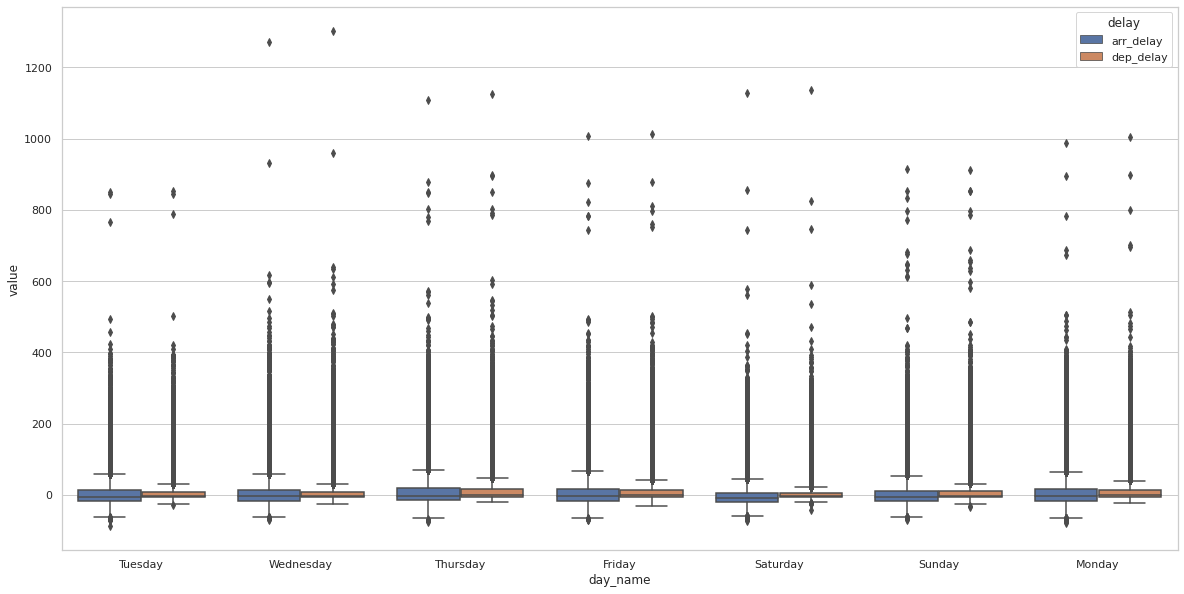

In [196]:
plt.figure(figsize = (20,10))

ax = sns.boxplot(x="day_name", y="value", hue="delay", data=mdf)  # RUN PLOT   
plt.show()

plt.clf()
plt.close()

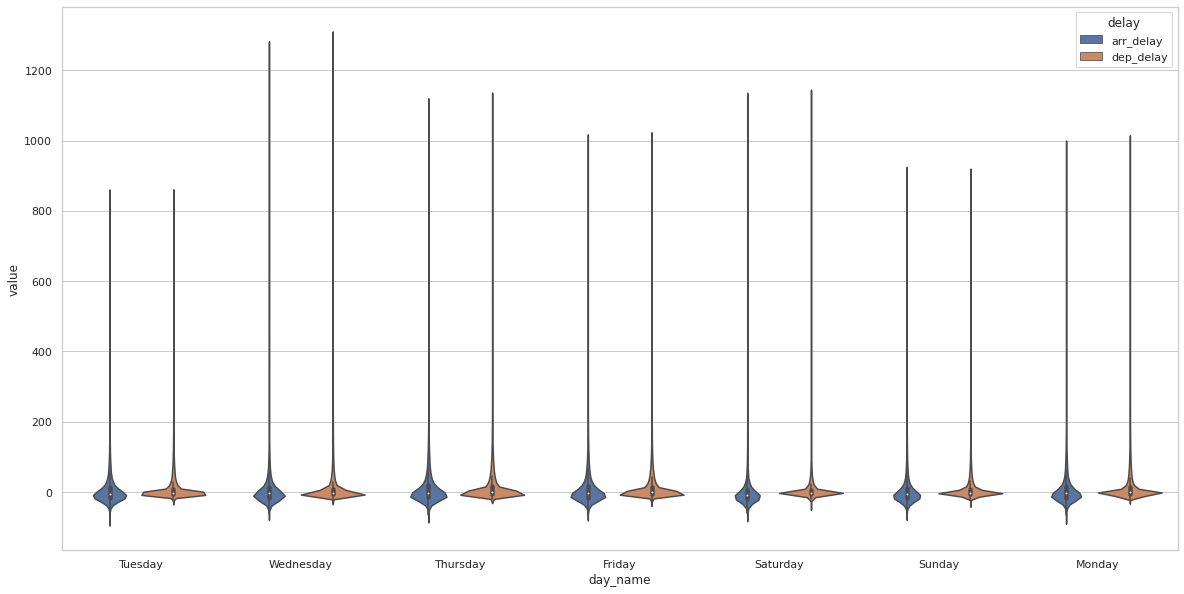

In [197]:
plt.figure(figsize = (20,10))

ax = sns.violinplot(x="day_name", y="value", hue="delay", data=mdf)  # RUN PLOT   
plt.show()

plt.clf()
plt.close()

### 7. związek opóźnienia startu samolotu a prędkością wiatru.

In [198]:
nycflights13

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour.y,date,day_name
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 05:00:00,2013-01-01,Tuesday
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01 05:00:00,2013-01-01,Tuesday
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00,2013-01-01,Tuesday
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00,2013-01-01,Tuesday
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0,2013-01-01 06:00:00,2013-01-01,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,63.21,190.0,11.50780,NaN,0.0,1016.6,10.0,2013-09-30 14:00:00,2013-09-30,Monday
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,65.37,200.0,6.90468,NaN,0.0,1015.8,10.0,2013-09-30 22:00:00,2013-09-30,Monday
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,46.99,70.0,5.75390,NaN,0.0,1016.7,10.0,2013-09-30 12:00:00,2013-09-30,Monday
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,52.35,70.0,8.05546,NaN,0.0,1017.5,10.0,2013-09-30 11:00:00,2013-09-30,Monday


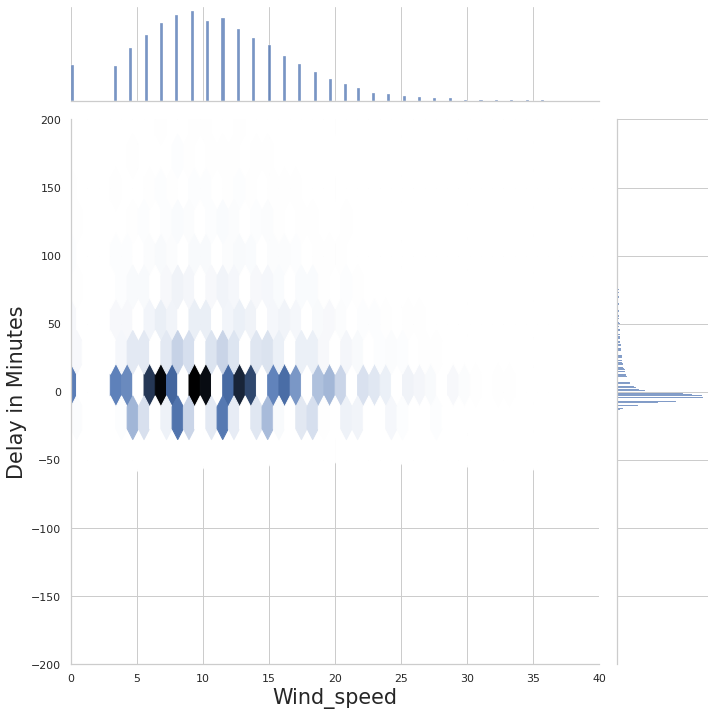

In [208]:
ax = sns.jointplot(x="wind_speed", y="dep_delay", kind="hex", data=nycflights13, ylim=(-200, 200), xlim = (0, 40), height = 10)  # RUN PLOT  
ax.set_axis_labels(xlabel = 'Wind_speed', ylabel = 'Delay in Minutes', fontsize = 'xx-large')

plt.show()

In [194]:
?sns.jointplot

Signature:
sns.jointplot(
    *,
    x=None,
    y=None,
    data=None,
    kind='scatter',
    color=None,
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    hue=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    **kwargs,
)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
x, y : vectors or keys in ``data``
    Variables that specify positions on the x and y axes.
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset 

**Dla chętnych**: Rozszerzone dane na temat lotów można znaleźć: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236. 

## Zadanie -  Największe miasta w Polsce pod względem liczby ludności
stan na 1 stycznia 2019: https://pl.wikipedia.org/wiki/Miasta_w_Polsce

Przedstaw na wykresie informacje na temat liczby ludności w 10 największych miastach w Polsce.

In [90]:
miasta_w_polsce = pd.DataFrame({
    'lp': np.arange(1, 11, 1),
    'miasto': ['Warszawa', 'Kraków', 'Łodź', 'Wrocław', 'Poznań', 'Gdańsk', 'Szczecin', 'Bydgoszcz', 
              'Lublin', 'Białystok'],
    'ludnosc': [1783321, 774839, 682679, 641607, 535802, 468158, 402067, 349021, 339770, 297356]
})
miasta_w_polsce

,lp,miasto,ludnosc
0,1,Warszawa,1783321
1,2,Kraków,774839
2,3,Łodź,682679
3,4,Wrocław,641607
4,5,Poznań,535802
5,6,Gdańsk,468158
6,7,Szczecin,402067
7,8,Bydgoszcz,349021
8,9,Lublin,339770
9,10,Białystok,297356


In [91]:
?plt.bar

Signature:
plt.bar(
    x,
    height,
    width=0.8,
    bottom=None,
    *,
    align='center',
    data=None,
    **kwargs,
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

width : float or array-like, default: 0.8
    The width(s) of the bars.

bottom : float or array-like, default: 0
    The y coordinate(s) of the bars bases.

align : {'center', 'edge'}, default: 'center'
    Alignment of the bars to the *x* coordinates:

    - 'center': Center the base on the *x* positions.
    - 'edge': Align the left edges of the bars 

In [92]:
?plt.barh

Signature: plt.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
Docstring:
Make a horizontal bar plot.

The bars are positioned at *y* with the given *align*\ment. Their
dimensions are given by *width* and *height*. The horizontal baseline
is *left* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
y : float or array-like
    The y coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

width : float or array-like
    The width(s) of the bars.

height : float or array-like, default: 0.8
    The heights of the bars.

left : float or array-like, default: 0
    The x coordinates of the left sides of the bars.

align : {'center', 'edge'}, default: 'center'
    Alignment of the base to the *y* coordinates*:

    - 'center': Center the bars on the *y* positions.
    - 'edge': Align the bottom edges of the bars with the *y*
      position

## Zadanie - Absolwenci  
Wczytaj dane `absolwenci_kierunek_20182019.csv` opisujące liczbe absolwentów wybranych kierunków w roku akademickim 2018/2019.

Przedstaw na wykresie:

a) proporcje absolwentów względem kierunku;

b) proporcje absolwentów względem kierunku i płci.

*Źródło danych*: https://stat.gov.pl/obszary-tematyczne/edukacja/edukacja/szkolnictwo-wyzsze-w-roku-akademickim-20182019-wyniki-wstepne,8,6.html

In [209]:
absolwenci = pd.read_csv('../data/absolwenci_kierunek_20182019.csv')
absolwenci

,Kierunek,Ogolem,Kobiety
0,Kształcenie,29071,24478
1,Nauki humanistyczne i sztuka,28250,20991
2,"Nauki społeczne, dziennikarstwo i informacja",35260,25006
3,"Biznes, administracja i prawo",73694,50374
4,"Nauki przyrodnicze, matematyka i statystyka",13406,9625
5,Technologie teleinformacyjne,13520,2179
6,"Technika, przemysł, budownictwo",64639,27585
7,Rolnictwo,6498,3748
8,Zdrowie i opieka społeczna,34513,27440
9,Usługi,27702,15591


In [94]:
?plt.pie

Signature:
plt.pie(
    x,
    explode=None,
    labels=None,
    colors=None,
    autopct=None,
    pctdistance=0.6,
    shadow=False,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    *,
    normalize=True,
    data=None,
)
Docstring:
Plot a pie chart.

Make a pie chart of array *x*.  The fractional area of each wedge is
given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
the fractional area directly and the array will not be normalized. The
resulting pie will have an empty wedge of size ``1 - sum(x)``.

The wedges are plotted counterclockwise, by default starting from the
x-axis.

Parameters
----------
x : 1D array-like
    The wedge sizes.

explode : array-like, default: None
    If not *None*, is a ``len(x)`` array which specifies the fraction
    of the radius with which to offset each wedge.

labels : list, default: None
    A se

b) proporcje absolwentów względem kierunku i płci.

## Zadanie - ceny mieszkań 
Wczytaj dane `ceny_mieszkan_polska.csv` opisujące średnie kwartalne ceny mieszkań za metr kwadratowy w największych miastach w Polsce. 

a) Przedstaw na wykresie zależność ceny od czasu dla cen mieszkań za metr kwadratowy w trzech wybranych miastach w Polsce.

b) Przedstaw na wykresie rozkład ceny w zależności od miasta.

In [95]:
ceny_mieszkan = pd.read_csv('../data/ceny_mieszkan_polska.csv') # rynek pierwotny
ceny_mieszkan.head(5)

,Kwartał,Białystok,Bydgoszcz,Gdańsk,Gdynia,Katowice,Kielce,Kraków,Lublin,Łódź,Olsztyn,Opole,Poznań,Rzeszów,Szczecin,Warszawa,Wrocław,Zielona Góra,7 miast
0,III 2006,2727,3243,5004,4937,3986,2919,6021,3456,3210,4000,3343.0,4770,2862,3215,5873,4750,2754,5427
1,IV 2006,2727,3947,6199,5284,4062,3493,7929,3314,4237,4800,NaN,4827,3401,3679,6095,5759,2869,6143
2,I 2007,4181,4501,6437,6466,4518,3382,8247,3604,4927,5149,NaN,7275,3420,4749,7509,6309,2872,6941
3,II 2007,4725,5700,7999,8934,5181,3902,8129,4143,5453,4776,NaN,7360,4080,5050,8000,6294,4153,8097
4,III 2007,4199,4994,8053,8114,6236,4651,8420,4645,5201,4900,4784.0,6838,4069,5035,8740,6444,4208,8212


### Zadanie - COVID-19
Wczytaj dane `covid19.csv` zawierające dane na temat liczby dziennych zakażeń oraz liczby zgonów spowodowanych koronawirusem.

a) Przedstaw na wykresie zależność liczby nowych zakażeń koronawirusem od czasu dla kilku wybranych krajów.

b) Przedstaw ranking krajów z największa liczbą stwierdzonych przypadków zakażeń koronawirusem oraz liczbą zgonów spowodowanych koronawirusem.

*Źródło*: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv

In [96]:
covid19 = pd.read_csv('../data/covid19.csv')
covid19.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


## Case study

Wczytaj dane `salaryData.csv` przedstawiające wysokość zarobków w największych firmach IT. Dokonaj analizy poniższego zbioru danych, m.in.

- sprawdź ogólny rozkład zarobków,
- sprawdź, w której firmie zarabia się najwięcej,
- sprawdź, na jakim stanowisku zarabia się najwięcej,
- sprawdź, w której lokalizacji zarabia się najwięcej,
- porównaj rozkład zarobków dla dwóch/trzech wybranych firm,
- porównaj rozkład dla dwóch/trzech stanowisk (np. Data Scientist vs. Software Engineer),
- porównaj rozkład dla kilku lokalizacji,
- porównaj rozkład dla dwóch/trzech stanowisk dla wybranej lokalizacji.

In [97]:
# https://www.levels.fyi/
# data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
# df = pd.DataFrame(data)

df = pd.read_csv('../data/salaryData.csv')
df.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127.0,"Redwood City, CA",1.5,1.5,NaN,107.0,20.0,10.0,NaN,NaN,7392.0,807.0,1
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100.0,"San Francisco, CA",5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,7419.0,807.0,2
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310.0,"Seattle, WA",8.0,0.0,NaN,155.0,NaN,NaN,NaN,NaN,11527.0,819.0,3
3,6/13/2017 5:35:36,Uber,Senior,Software Engineer,578.0,"San Francisco, CA",10.0,2.0,NaN,180000.0,1550000.0,9000.0,NaN,Stock based on $48.65 per share.,7419.0,807.0,4
4,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,200.0,"Redmond, WA",9.0,9.0,NaN,169000.0,100000.0,30000.0,NaN,NaN,11521.0,819.0,5


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16683 entries, 0 to 16682
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                16683 non-null  object 
 1   company                  16683 non-null  object 
 2   level                    16678 non-null  object 
 3   title                    16683 non-null  object 
 4   totalyearlycompensation  16683 non-null  float64
 5   location                 16682 non-null  object 
 6   yearsofexperience        16683 non-null  float64
 7   yearsatcompany           16683 non-null  float64
 8   tag                      15867 non-null  object 
 9   basesalary               14201 non-null  float64
 10  stockgrantvalue          12179 non-null  float64
 11  bonus                    12441 non-null  float64
 12  gender                   11629 non-null  object 
 13  otherdetails             2032 non-null   object 
 14  cityid                

In [99]:
df.shape

(16683, 17)

## Dobry czy zły wykres?

- https://ceny.szybko.pl/Warszawa-ceny-mieszkan.html

## Inne ciekawe biblioteki
- https://plot.ly/python/
- https://docs.bokeh.org/en/latest/index.html
- http://www.pygal.org/en/latest/index.html
- http://ggplot.yhathq.com/

In [100]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

ModuleNotFoundError: No module named 'plotly'